# Задание 3.

Загрузите [данные по изменению температуры поверхности земли](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data). Для этого может понадобится зарегистрироваться на [Kaggle](https://kaggle.com). Затем нужно будет работать с данными, которые содержатся в файле **GlobalLandTemperaturesByMajorCity.csv**

In [49]:
import zipfile

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

with zipfile.ZipFile("archive.zip") as z:
    with z.open("GlobalLandTemperaturesByMajorCity.csv") as f:
        df = pd.read_csv(f, parse_dates=["dt"])

df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [50]:
df.dt[9]

Timestamp('1849-10-01 00:00:00')

# Задание 3.1 (1 балл)

В последующих заданиях будут учитываться данные начиная с 01.01.1950. Для этого создайте новый `DataFrame`, в котором удалены все строки до 01.01.1950. Используйте созданный DataFrame в последующих заданиях.  

In [51]:
df = df[df['dt'] >= pd.Timestamp('1950-01-01')]
# изменим в формат день-месяц-год
# df['dt'] = df['dt'].apply(lambda x: x.date())
df.reset_index(drop=True, inplace=True)
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1950-01-01,26.773,0.239,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1950-02-01,27.527,0.348,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1950-03-01,28.344,0.431,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1950-04-01,27.830,0.467,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1950-05-01,26.896,0.248,Abidjan,Côte D'Ivoire,5.63N,3.23W


# Задание 3.2 (2 балла)

Постройте график среднегодовых температур в городе Торонто.

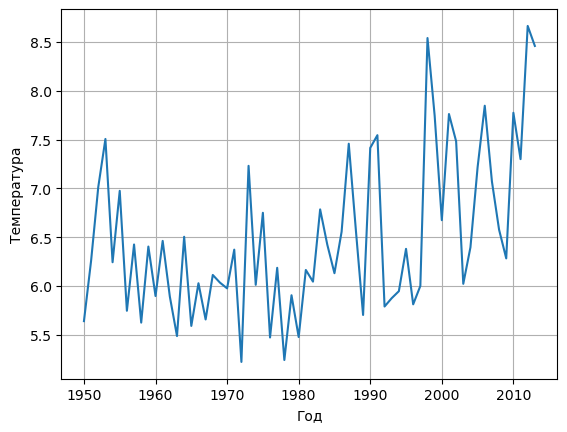

In [66]:
T_df = df[df['City'] == 'Toronto']
T_df.groupby(T_df['dt'].dt.year).mean()['AverageTemperature'].plot()
plt.xlabel('Год')
plt.ylabel('Температура')
plt.grid()
plt.show()

# Задание 3.3 (2 балла)

Найдите город, для которого выборочная дисперсия температур на приведенных данных максимальна. 

In [84]:
df.groupby(df['City']).var()['AverageTemperature'].idxmax()

'Harbin'

# Задание 3.4 (4 балла)

На одной оси постройте графики, отображающие:
1. Зависимость выборочной дисперсии температур от широты города (Latitude).
2. Зависимость средней температуры в январе 1975 года от широты города (Latitude).
3. Зависимость средней температуры в июле 1975 года от широты города (Latitude).

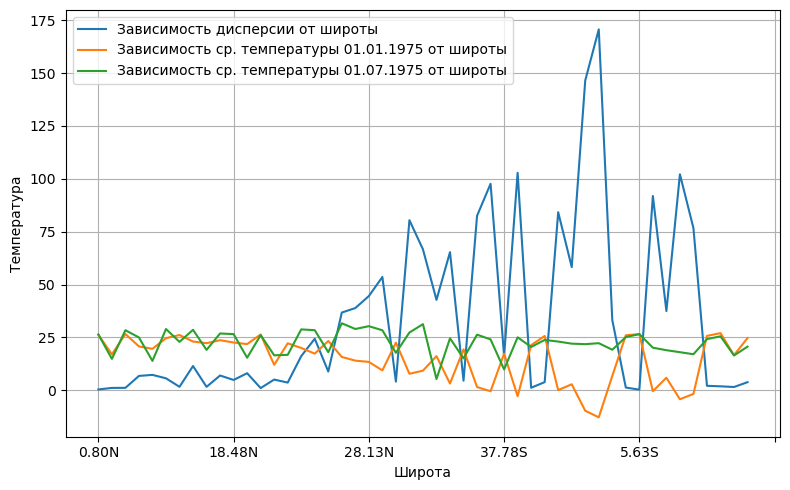

In [172]:
fig, ax = plt.subplots(figsize=(8, 5))

latitude_var = df.groupby(df['Latitude']).var()
january1975_avg = df[df['dt'] == pd.Timestamp('1975-01-01')].groupby(df['Latitude']).mean()
july1975_avg = df[df['dt'] == pd.Timestamp('1975-07-01')].groupby(df['Latitude']).mean()

latitude_var.plot(y='AverageTemperature', ax=ax, label="Зависимость дисперсии от широты")
january1975_avg.plot(y='AverageTemperature', ax=ax, label="Зависимость ср. температуры 01.01.1975 от широты")
july1975_avg.plot(y='AverageTemperature', ax=ax, label="Зависимость ср. температуры 01.07.1975 от широты")

plt.xlabel('Широта')
plt.ylabel('Температура')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

# Задание 3.5 (6 баллов)

Посчитайте данные по среднегодовой температуре в Санкт-Петербурге. Определите года, в которых средняя температура была выше, чем в предыдущем  и последующем году. Постройте график среднегодовой температуры и обозначьте на нём найденные года (произвольным образом). 

Постройте модель линейной регрессии (можно использовать [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)): $\mathbb{год} \rightarrow \mathbb{средняя\_температура}$. Отобразите прямую на предыдущем графике. 

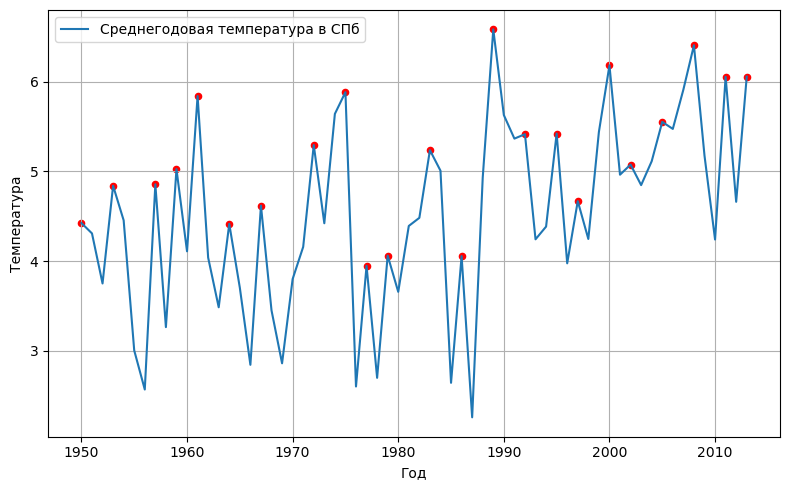

In [173]:
from scipy.signal import argrelextrema
from numpy import greater_equal

fig, ax = plt.subplots(figsize=(8, 5))

annualy_spb = df[df['City'] == 'Saint Petersburg'].groupby(df.dt.dt.year).mean()
annualy_spb.plot(y='AverageTemperature', ax=ax, label="Среднегодовая температура в СПб")
local_max = annualy_spb.iloc[argrelextrema(annualy_spb['AverageTemperature'].values,
                                           greater_equal,
                                           order=1)[0]]
# index to column for scatter plot
local_max = local_max.reset_index(level=0)
local_max.plot(x='dt', y='AverageTemperature', kind='scatter', ax=ax, color='r')

plt.xlabel('Год')
plt.ylabel('Температура')
plt.grid()
plt.tight_layout()
plt.show()

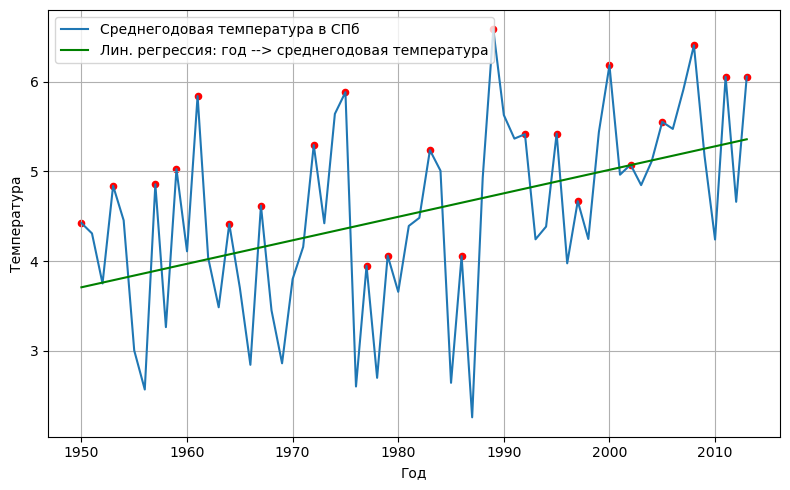

In [184]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(annualy_spb.index.values.reshape(-1, 1),
           annualy_spb['AverageTemperature'].values)

avg_temperature_regression = linreg.predict(annualy_spb.index.values.reshape(-1, 1))
fig, ax = plt.subplots(figsize=(8, 5))

annualy_spb.plot(y='AverageTemperature', ax=ax, label="Среднегодовая температура в СПб")
local_max.plot(x='dt', y='AverageTemperature', kind='scatter', ax=ax, color='r')
ax.plot(annualy_spb.index.values, avg_temperature_regression,
        label="Лин. регрессия: год --> среднегодовая температура",
        color='g')

plt.xlabel('Год')
plt.ylabel('Температура')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Задание 3.6 (4 балла)

Найдите города, для которых: 
1. Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна.
2. Самая большая средняя разница между средней температурой января и средней температурой июля.
3. Наибольшее среднее количество месяцев с отрицательной температурой в году.

In [230]:
df.groupby([df.dt.dt.year, 'City']).mean()['AverageTemperature']

dt    City       
1950  Abidjan        26.195417
      Addis Abeba    17.080167
      Ahmadabad      26.061083
      Aleppo         17.154917
      Alexandria     20.572250
                       ...    
2013  Tokyo          13.911500
      Toronto         8.459444
      Umm Durman     30.650500
      Wuhan          19.285500
      Xian           14.460000
Name: AverageTemperature, Length: 6400, dtype: float64

In [215]:
print("Наибольшее среднее количество месяцев с отрицательной температурой в году:",
      df[df['AverageTemperature'] < 0].groupby('City').count()['dt'].idxmax())

Наибольшее среднее количество месяцев с отрицательной температурой в году: Harbin


# Задание 3.7 (3 балла)

Отобразите города на карте, например с помощью [geopandas/folium](https://geopandas.org/en/stable/gallery/plotting_with_folium.html) или [plotly](https://plotly.com/python-api-reference/generated/plotly.express.scatter_geo.html). Причем цвет метки должен соответствовать средней температуре в январе за последние 10 лет. 


**\***(+3 балла). Вычислите прямую с "трендом" по изменению температуры в каждом городе в период 1950-2013 (можно с помощью линейной регрессии, как в задании **3.5**). Отобразите города цветом, который зависит от угла наклона этой прямой. 


**\***(+1 балл) В дополнение к предыдущему пункту, используйте библиотеку [pwlf](https://pypi.org/project/pwlf/) с фиксированным числом сегментов и визуализируйте угол наклона последнего сегмента.

# *Задание 3.8 (8 баллов)

Цель - создать проект, который как минимум включает:
1. Использование юнит-тестов ([pytest](https://pytest.org)).
2. Применение средств форматирования и проверки исходного кода (например: [isort](https://pycqa.github.io/isort/), [black](https://black.readthedocs.io/en/stable/), [flake8](https://flake8.pycqa.org/en/latest/), [mypy](https://mypy.readthedocs.io/en/stable/)).
3. Спецификацию проекта в [pyproject.toml](https://pip.pypa.io/en/stable/reference/build-system/pyproject-toml/).
4. Использование утилит для работы с командной строкой ([argparse](https://docs.python.org/3/library/argparse.html), [click](https://click.palletsprojects.com/en/8.1.x/) и т.п.)
5. Сборку проекта в Wheel-файл.

Проект должен быть загружен в репозиторий. Функционал - произвольный, но должны использоваться данные из этого домашнего задания. Сам файл передается в качестве первого аргумента командной строки.  Например:

> python3 -m homeproject.app GlobalLandTemperaturesByMajorCity.csv 1980

Выдает самый жаркий месяц и город по наблюдениям за 1980 год.

*Ссылка на проект*